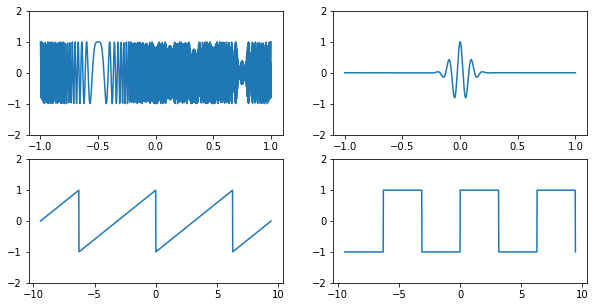

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
from scipy.signal import chirp, sawtooth, square, gausspulse
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5


t=np.linspace(-1,1,1000)
plt.subplot(221); plt.ylim([-2,2])
plt.plot(t,chirp(t,f0=100,t1=0.5,f1=200)) # plot a chirp
plt.subplot(222); plt.ylim([-2,2])
plt.plot(t,gausspulse(t,fc=10,bw=0.5)) # Gauss pulse
plt.subplot(223); plt.ylim([-2,2])
t*=3*np.pi
plt.plot(t,sawtooth(t)) # sawtooth
plt.subplot(224); plt.ylim([-2,2])
plt.plot(t,square(t)) # Square wave
plt.show()

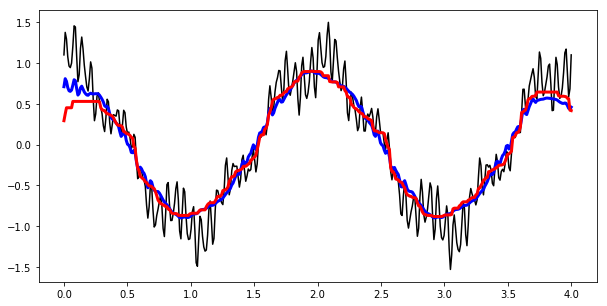

In [2]:
from numpy import sin, cos, pi, linspace
from scipy.signal import wiener, medfilt

f=lambda t: cos(pi*t) + 0.2*sin(5*pi*t+0.1) + 0.2*sin(30*pi*t) + 0.1*sin(32*pi*t+0.1) + 0.1*sin(47* pi*t+0.8)
t=linspace(0,4,400); 
signal=f(t)

plt.plot(t,signal,'k')
plt.plot(t,wiener(signal,mysize=55),'b',linewidth=3) 
plt.plot(t,medfilt(signal,kernel_size=55),'r',linewidth=3)
plt.show()

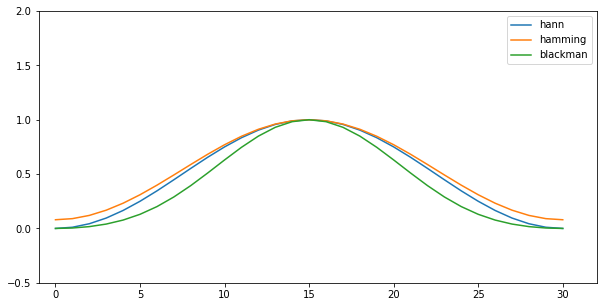

In [11]:
from scipy.signal import hann, hamming, blackman
windows=['hann', 'hamming', 'blackman']
for w in windows:
    eval( 'plt.plot(' + w + '(31))' )
plt.ylim([-0.5,2]); plt.xlim([-1,32])
plt.legend(windows)
plt.show()

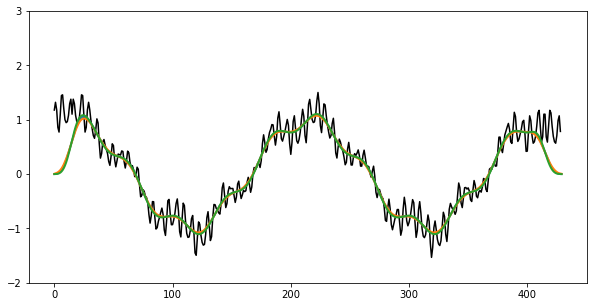

In [12]:
extended_signal=np.r_[signal[15:0:-1],signal,signal[-1:-15:-1]]
plt.plot(extended_signal,'k')
for w in windows:
    window = eval( w+'(31)')
    output=np.convolve(window/window.sum(),signal)
    plt.plot(output,linewidth=2)
plt.ylim([-2,3])
plt.show()

In [15]:
from scipy.io.wavfile import write, read
rate,data_noise=read('record_noise_sin.wav')
rate, data = read('record.wav')

In [3]:
from scipy.fftpack import fft2, ifft2
import matplotlib.pyplot as plt
